<h1 style="text-align:center"> Deep CNN Image Classifier with ANY Images </h1>

<img src="https://1.bp.blogspot.com/-jmRt4OcNgRw/XwszZ9s5aVI/AAAAAAAACpU/6jl_L6WXCBkeHkkqbGfASMdzXnAJOcoBwCNcBGAsYHQ/s1600/T314762765_g.jpg" alt="Diabetes" width = "500"/>

## 1. Building Data Pipeline

**This section checks and cleans the dataset by removing images with unsupported formats. It uses <code>OpenCV (cv2)</code> for reading images and <code>imghdr</code> to determine their formats.**

In [1]:
# ! pip install tensorflow opencv-python matplotlib

In [2]:
# ! pip list

In [3]:
# Importing necessary libraries
import tensorflow as tf
import os
import cv2
import imghdr
import numpy as np
from matplotlib import pyplot as plt

In [4]:
os.path.join('data','happy')

'data\\happy'

In [5]:
# Setting up GPU memory growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [6]:
# Defining data directory
data_dir = 'C:/Users/Admin123/OneDrive/Desktop/data'

In [7]:
# Valid image extensions
image_exts = ['jpeg', 'jpg', 'bmp', 'png']

In [8]:
# Iterating through image classes and images to check and clean the dataset
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            # Reading the image and checking its format
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            
            # Removing images not in the allowed extensions
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))
            # Uncomment the line below to remove problematic images
            # os.remove(image_path)

## 2. Load Data

**Utilizes <code>TensorFlow</code> to load the image dataset from the specified directory and displays a sample batch of images.**

In [9]:
# Load Data using TensorFlow
data = tf.keras.utils.image_dataset_from_directory('C:/Users/Admin123/OneDrive/Desktop/data')
data_iterator = data.as_numpy_iterator()
batch = data_iterator.next()

Found 304 files belonging to 2 classes.


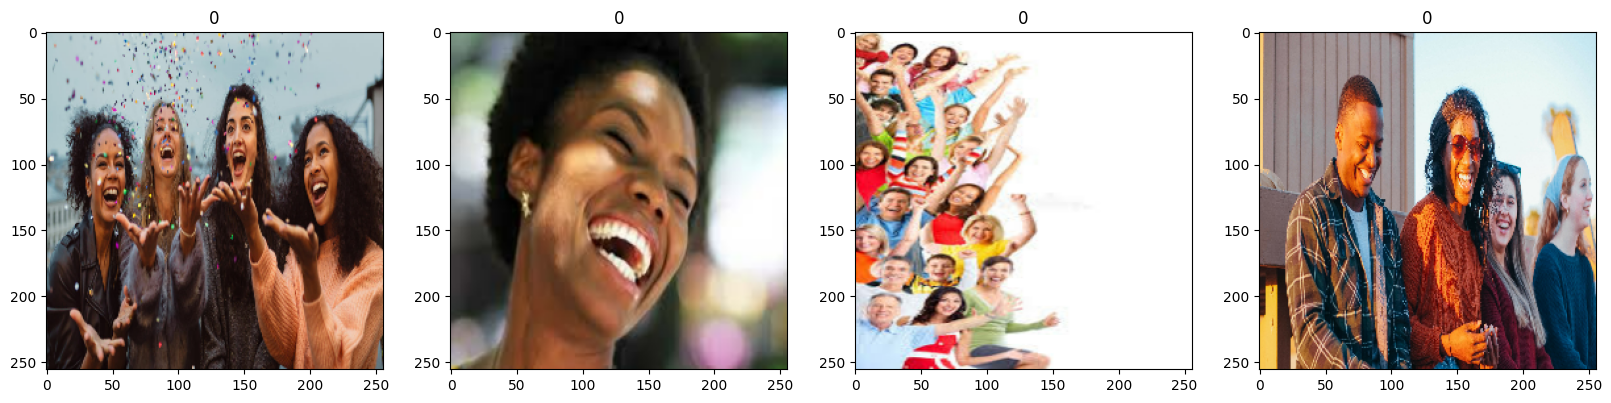

In [10]:
# Displaying sample images from the dataset
fig, ax = plt.subplots(ncols=4, figsize=(20, 20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

## 3. Preprocessing Data

* **Scale Data:** Normalizes pixel values to the range <code>[0, 1]</code>.
* **Split Data:** Divides the dataset into training, validation, and test sets based on specified proportions.

In [11]:
# 3.1 Scale Data
data = data.map(lambda x, y: (x / 255, y))

In [12]:
# Displaying a sample batch after scaling
data.as_numpy_iterator().next();

In [13]:
# 3.2 Split Data into Train, Validation, and Test sets
train_size = int(len(data) * 0.7)
val_size = int(len(data) * 0.2)
test_size = int(len(data) * 0.1)

In [14]:
# Creating train, validation, and test datasets
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size).take(test_size)

## 4. Build Deep Learning Model